In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("12_coin_Bitcoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [2]:
df.loc[:, 'Target'] = (df['High'] + df['Low']) / 2
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Target
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,140.744003
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,140.489998
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,123.805000
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,108.940948
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,93.613998


In [3]:
df.drop(columns=['Name','Symbol','SNo'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2991 non-null   object 
 1   High       2991 non-null   float64
 2   Low        2991 non-null   float64
 3   Open       2991 non-null   float64
 4   Close      2991 non-null   float64
 5   Volume     2991 non-null   float64
 6   Marketcap  2991 non-null   float64
 7   Target     2991 non-null   float64
dtypes: float64(7), object(1)
memory usage: 187.1+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Timestamp'] = pd.DataFrame({'Timestamp': (df['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)})
df.drop(columns=['Date'],inplace=True)
df.head()

,High,Low,Open,Close,Volume,Marketcap,Target,Timestamp
0,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,140.744003,1367279999
1,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,140.489998,1367366399
2,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,123.805000,1367452799
3,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,108.940948,1367539199
4,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,93.613998,1367625599


## **Linear Regression**

In [5]:
#Applying the Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=df[['High','Low','Open','Close','Volume','Marketcap','Timestamp']]
Y=df['Target']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
ypred=model.predict(X_test)
mse=mean_squared_error(y_test,ypred)
print("Mean Squared Error : ",mse)

Mean Squared Error :  2.090276405486277e-12


In [6]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,ypred)
print("Mean Squared Error : ",mae)

Mean Squared Error :  9.8266273595424e-07


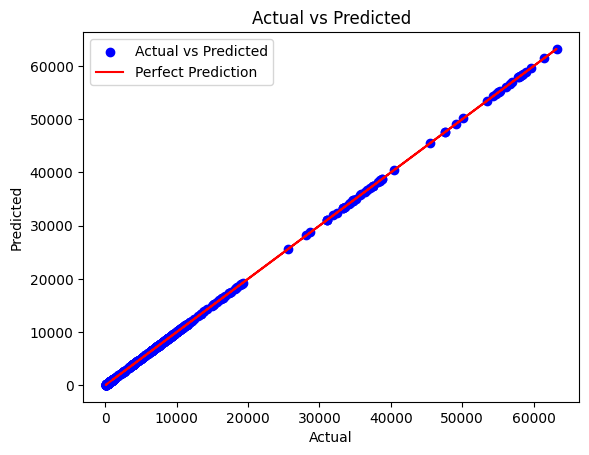

In [12]:
# Plotting the linear regression line
plt.scatter(y_test, ypred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()